In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import SG_OAIS, ADAM_OAIS, AdaGrad_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)


plt.rcParams['figure.dpi'] = 300

In [3]:
m1 = np.array([3, 0])
m2 = np.array([-3, 0])
Sigma1 = np.array([[1, 0], [0, 1]])
Sigma2 = np.array([[1, 0], [0, 1]])

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = MixNormalRV([0.5, 0.5], [m1, m2], [Sigma1, Sigma2])

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

In [4]:
runs = []
n_exp_mc = 1000
for i in tqdm(range(n_exp_mc)):
    one_run = mcsim(phi, pi, N=1000)
    runs.append(one_run)
GT = sum(runs)/n_exp_mc

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:01<00:00, 16.35it/s]


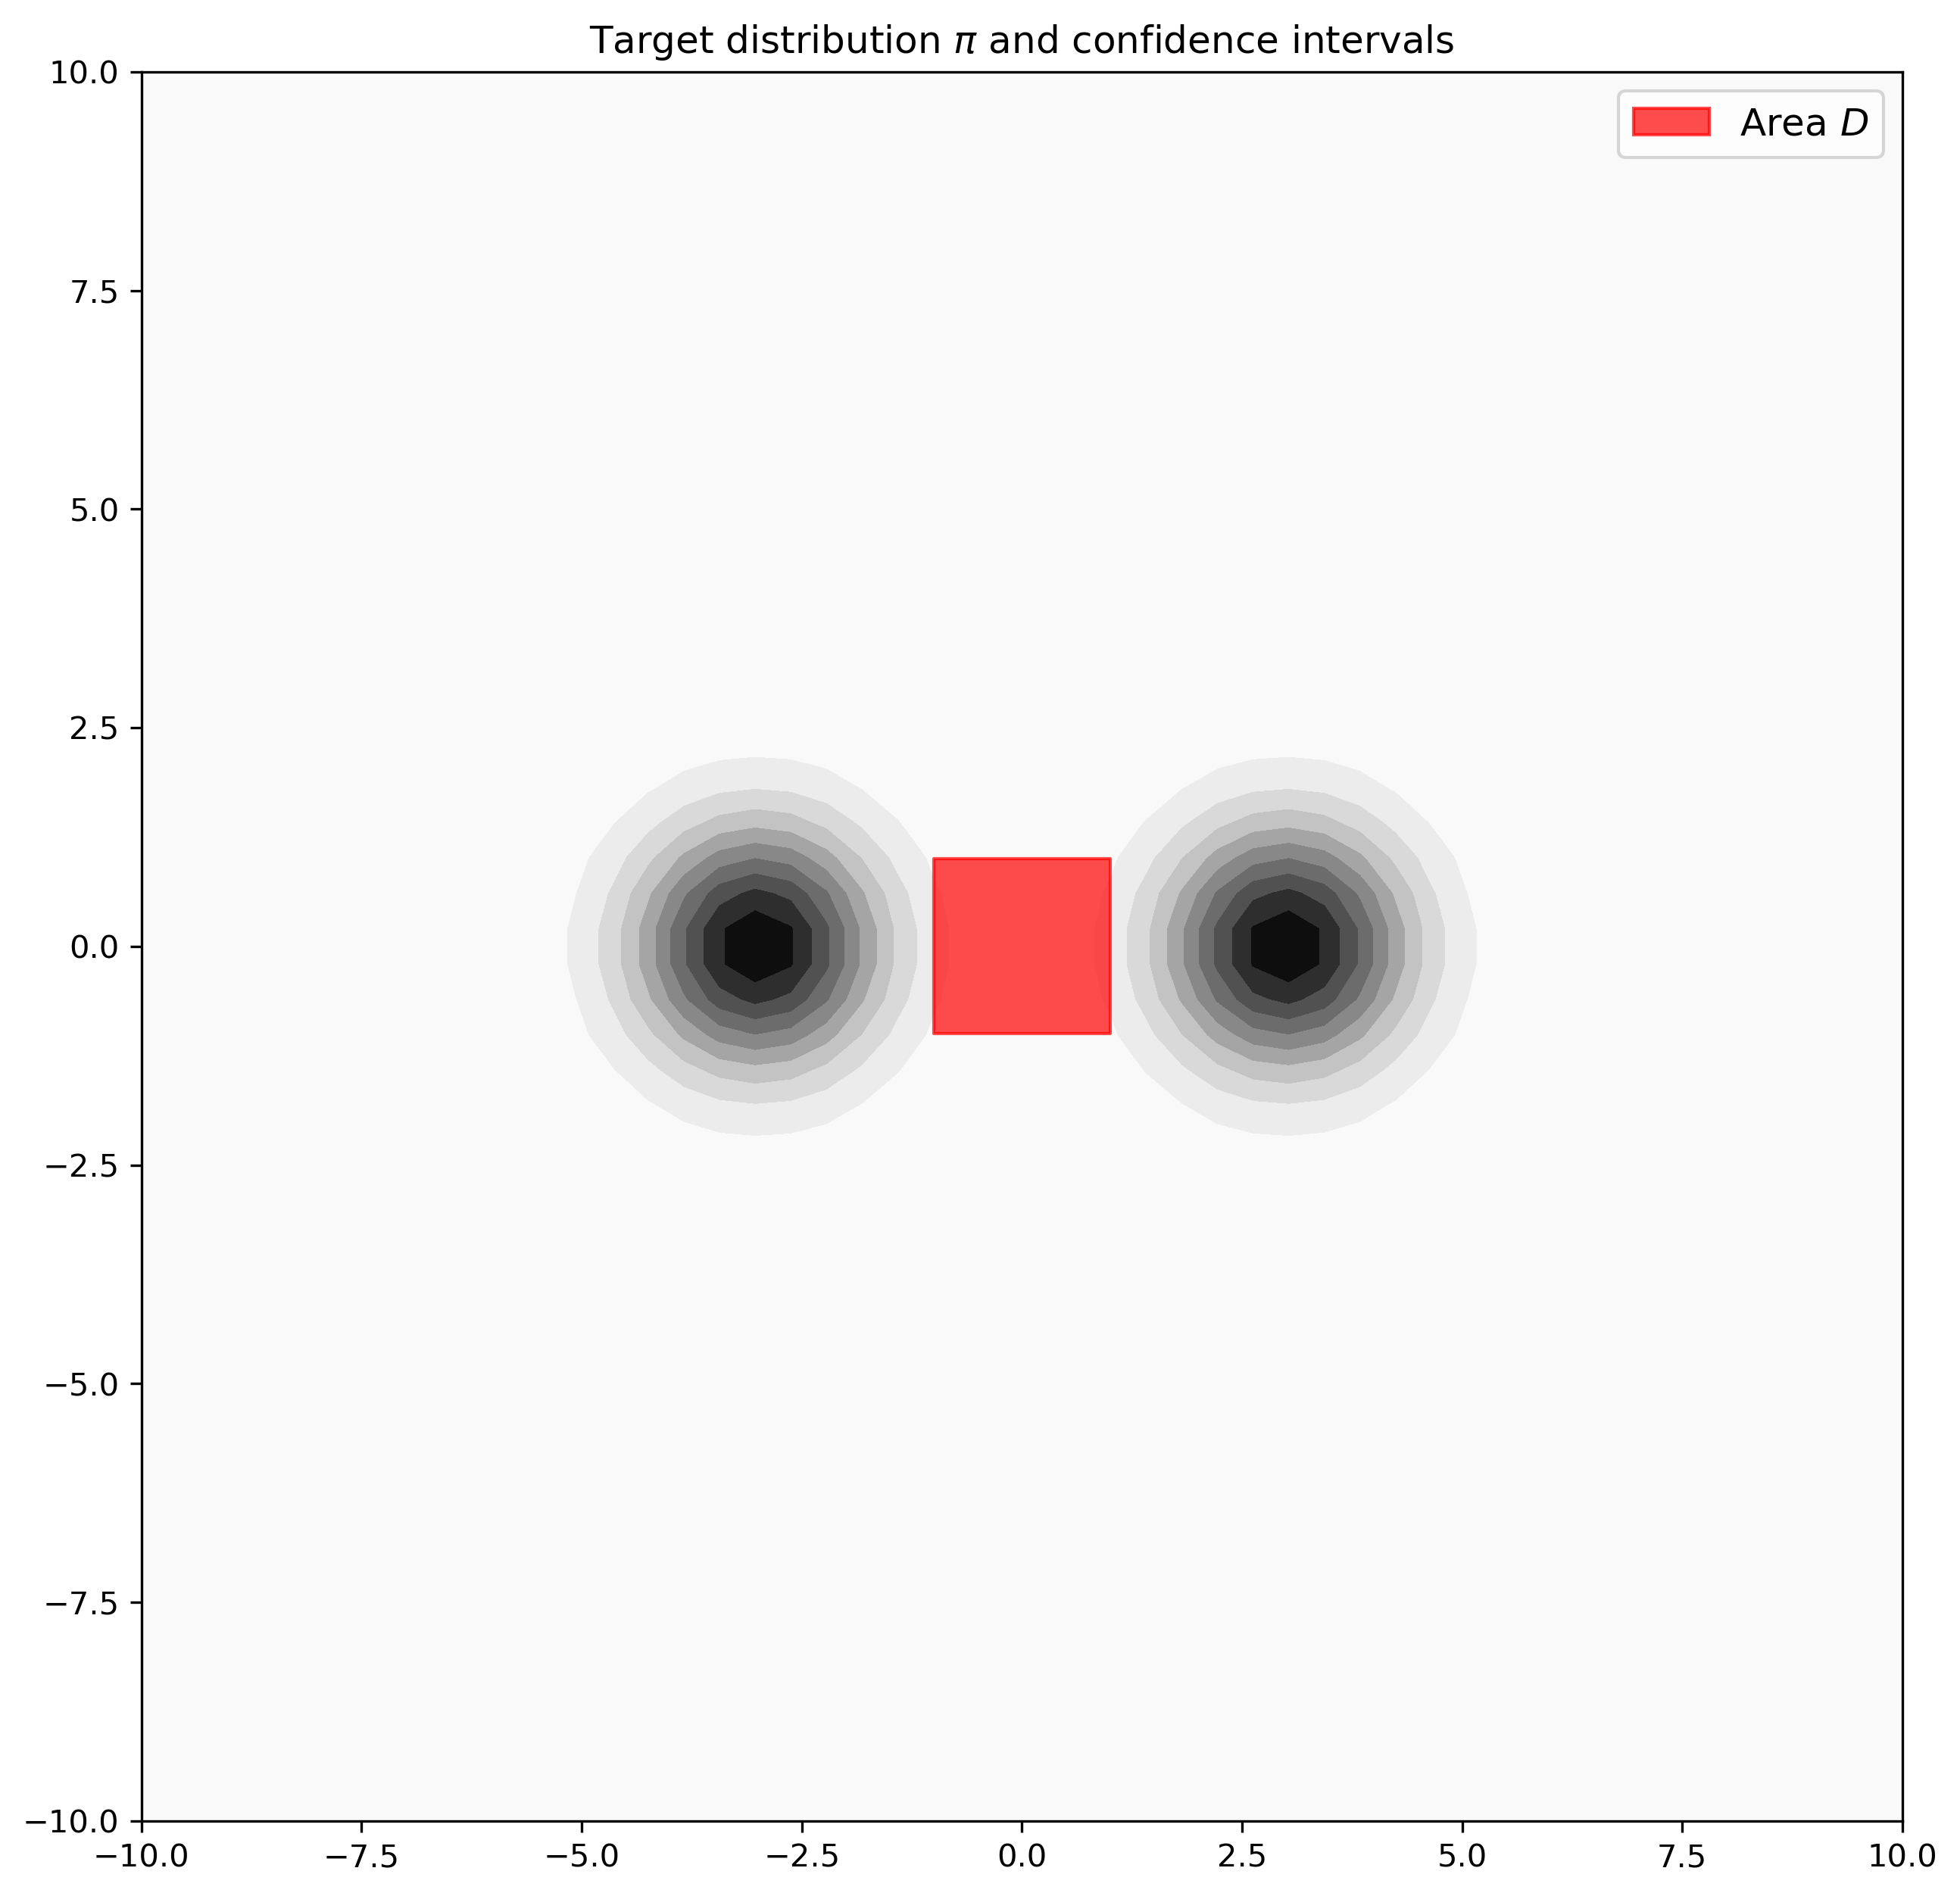

In [45]:
# make figure and ax
fig, ax = plt.subplots(1, 1, figsize=(10,10))
X, Y, Z_pi = fill_z(pi)
ax.contourf(X, Y, Z_pi, levels=10, cmap="Greys", zorder=-10)
ax.fill_between([-1, 1], [-1, -1], [1, 1], color='red', zorder=5, alpha=0.7, label="Area $D$")
ax.legend(loc="upper right", fontsize=12)
ax.set_title("Target distribution $\pi$ and confidence intervals")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.savefig("figs/mixture/mixture_target.png")
plt.show()


In [5]:
N = 100
Niter = int(1e5)
alpha_AdaGrad = 1e-2
nexperiments = 100
results_array_AdaGrad = []
distribution_array_AdaGrad = []
for _ in range(nexperiments):
    r_AdaGrad, d_AdaGrad = AdaGrad_OAIS(phi, pi, q, N, Niter, alpha=alpha_AdaGrad)
    results_array_AdaGrad.append(r_AdaGrad)
    distribution_array_AdaGrad.append(d_AdaGrad)


 54%|█████▍    | 54002/100000 [01:12<01:04, 710.72it/s]

In [21]:
# transpose array
distribution_array_ADAM = np.array(distribution_array_AdaGrad).T


In [22]:
distrs = [average_dist(distribution_array_ADAM[i]) for i in range(len(distribution_array_ADAM))]
distrs

[N([ 10. -10.], [[40.  0.]
  [ 0. 40.]]),
 N([ 5.33333333 -5.33333334], [[31.11111127  8.88888905]
  [ 8.88888905 31.11111127]]),
 N([ 4.33234215 -4.33486268], [[28.8262185  10.29926112]
  [10.29926112 28.72809663]]),
 N([ 3.97896465 -3.98969967], [[26.64553663  9.31163353]
  [ 9.31163353 26.48300008]]),
 N([ 3.82578942 -3.81074013], [[25.60962829  8.7955659 ]
  [ 8.7955659  25.33385937]]),
 N([ 3.66023339 -3.64085387], [[24.62257393  8.35306731]
  [ 8.35306731 24.27330544]]),
 N([ 3.59489714 -3.56056957], [[24.1413242   8.11101866]
  [ 8.11101866 23.76451666]]),
 N([ 3.48100845 -3.44871651], [[23.4672878   7.79324964]
  [ 7.79324964 23.04641311]]),
 N([ 3.39208519 -3.35295389], [[23.07634311  7.63231078]
  [ 7.63231078 22.53161087]]),
 N([ 3.36249591 -3.31744489], [[22.8063769   7.46537261]
  [ 7.46537261 22.25253178]]),
 N([ 3.28992553 -3.23745892], [[22.41459162  7.28194356]
  [ 7.28194356 21.79117983]]),
 N([ 3.20475924 -3.15123978], [[21.9681812   7.11528265]
  [ 7.11528265 21.312

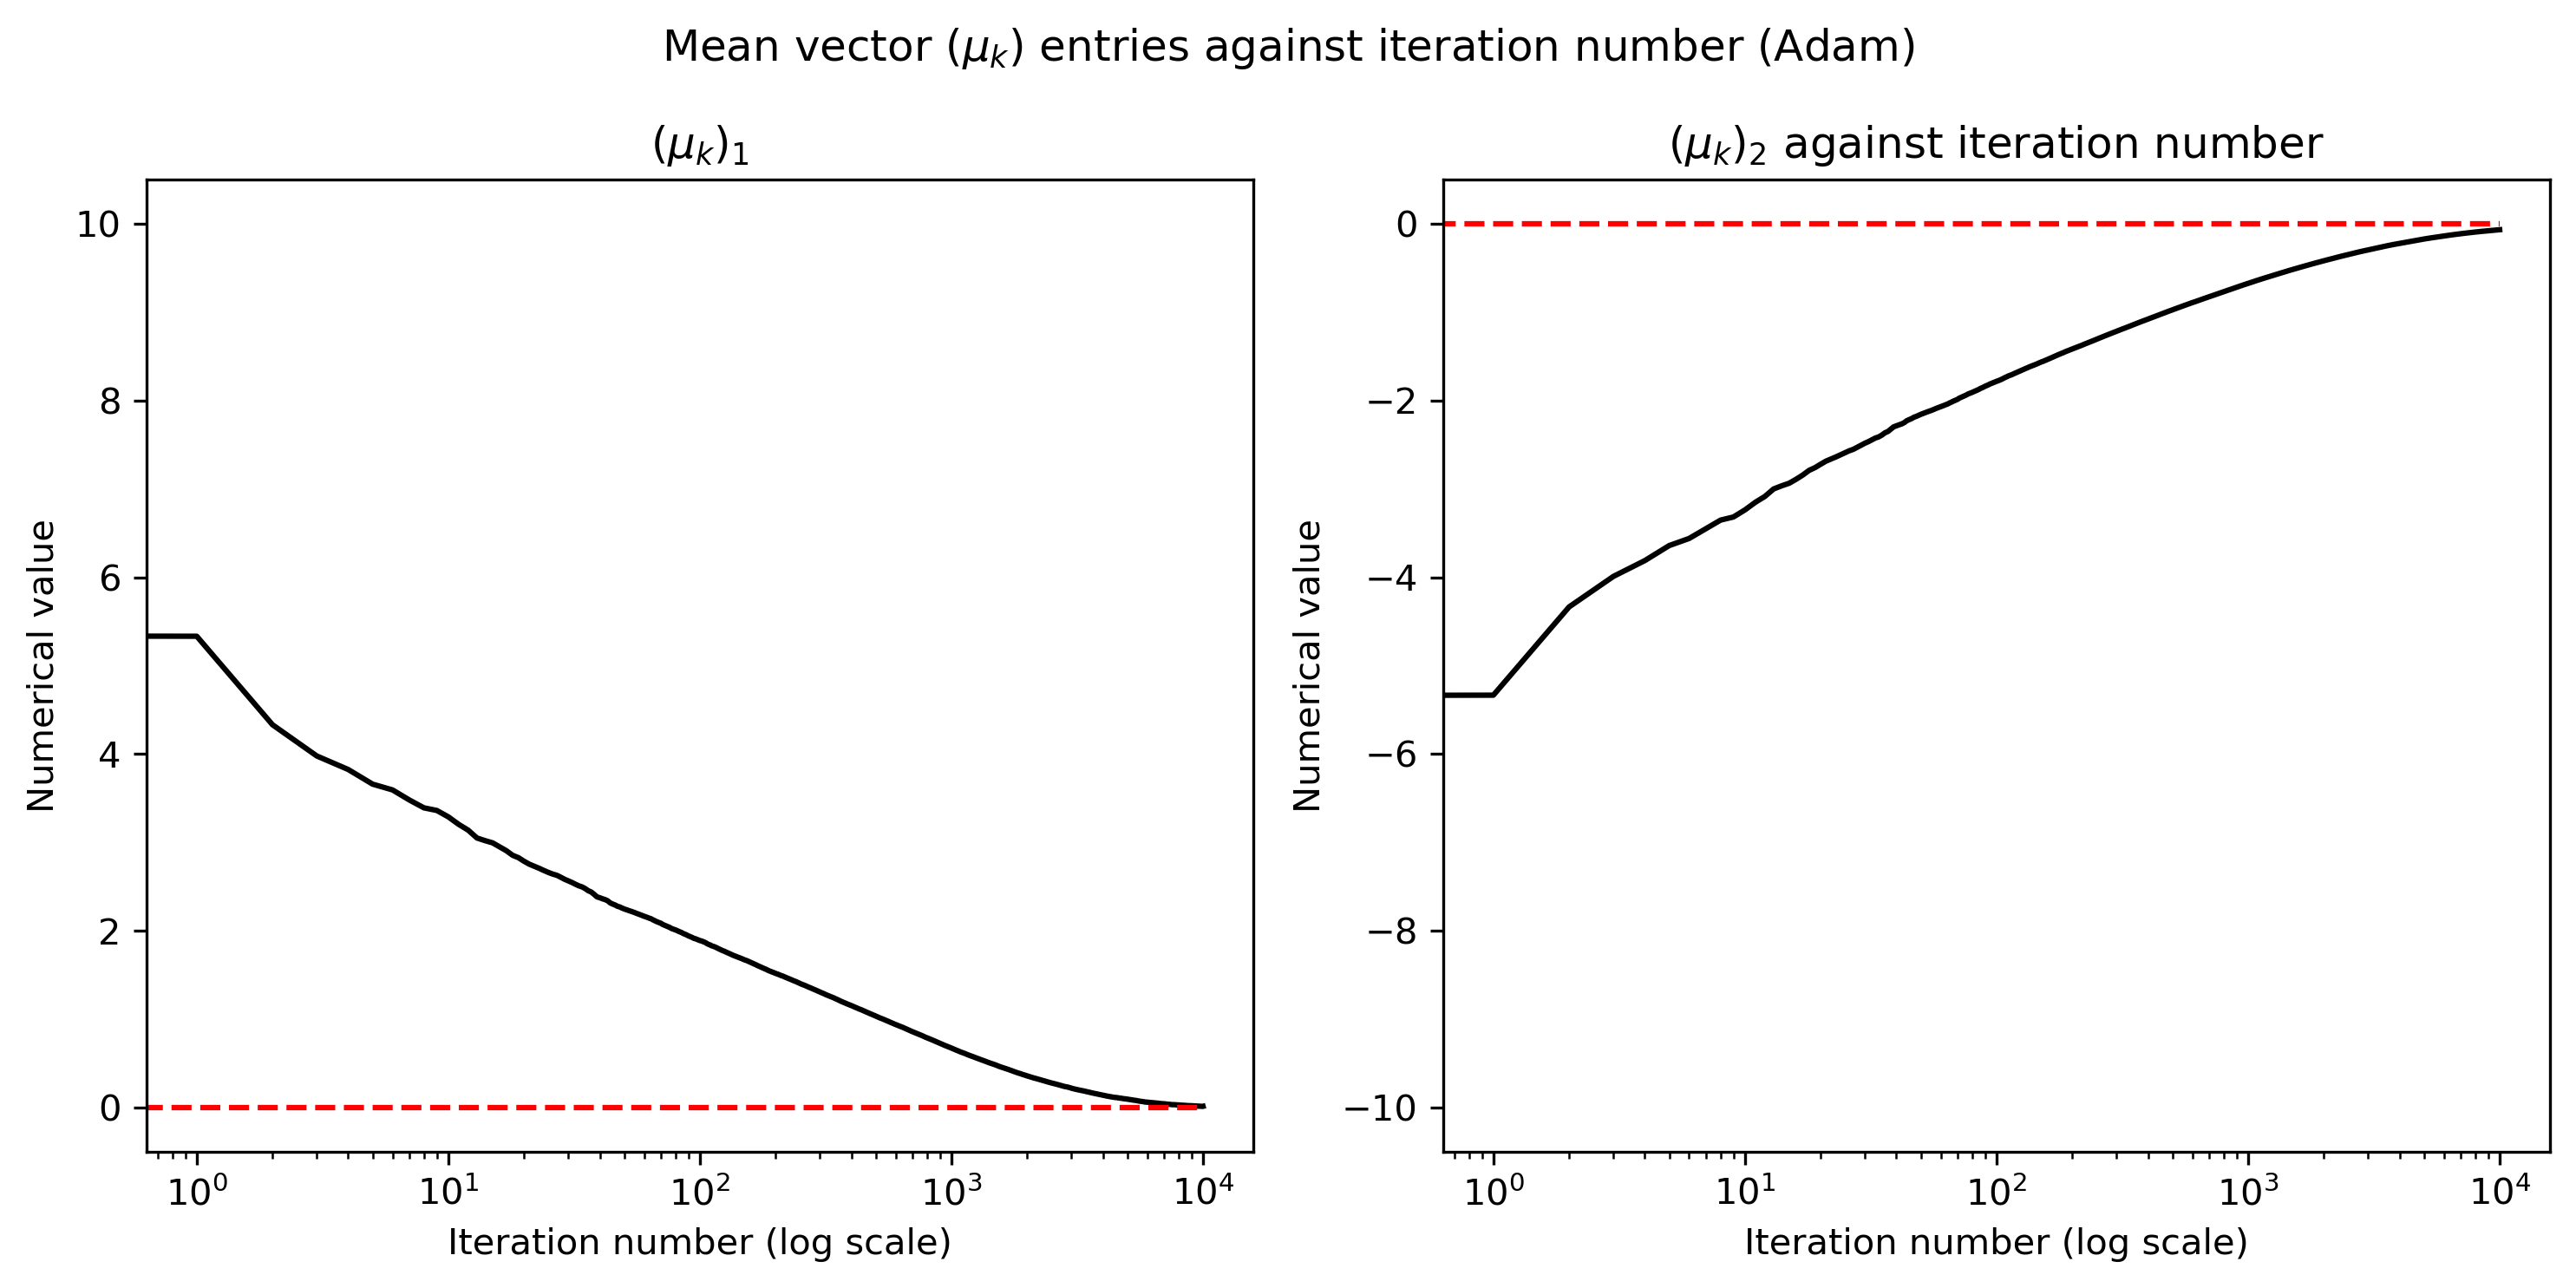

In [23]:
#mu1 = [average_distributions[i].mu[0] for i in range(0, Niter)]
#mu2 = [average_distributions[i].mu[1] for i in range(0, Niter)]

# average distributions across experiments


# make 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#ax1.plot(mu1, label="$(\mu_k)_1$", color="black")
mu_1 = [d.mu[0] for d in distrs]
mu_2 = [d.mu[1] for d in distrs]
ax1.plot(mu_1, color="black", alpha=1)
ax2.plot(mu_2, color="black", alpha=1)
ax1.hlines(pi.avg_dist.mu[0], 0, Niter, label="$\pi_{m1}$", color="red", linestyle="--")
#ax1.legend(loc="center right", fontsize=12)
ax1.set_xlabel("Iteration number (log scale)")
ax1.set_ylabel("Numerical value")
ax1.set_title("$(\mu_k)_1$")
ax1.set_xscale("log")

#ax2.plot(mu2, label="$(\mu_k)_2$", color="black")
ax2.set_xscale("log")
ax2.set_xscale("log")
ax2.set_xlabel("Iteration number (log scale)")
ax2.set_ylabel("Numerical value")
ax2.set_title("$(\mu_k)_2$ against iteration number")
ax2.hlines(pi.avg_dist.mu[1], 0, Niter, label="$\pi_{m2}$", color="red", linestyle="--")
#ax2.legend(loc="center right", fontsize=12)
fig.suptitle("Mean vector $(\mu_k)$ entries against iteration number (Adam)")
fig.tight_layout()
plt.show()

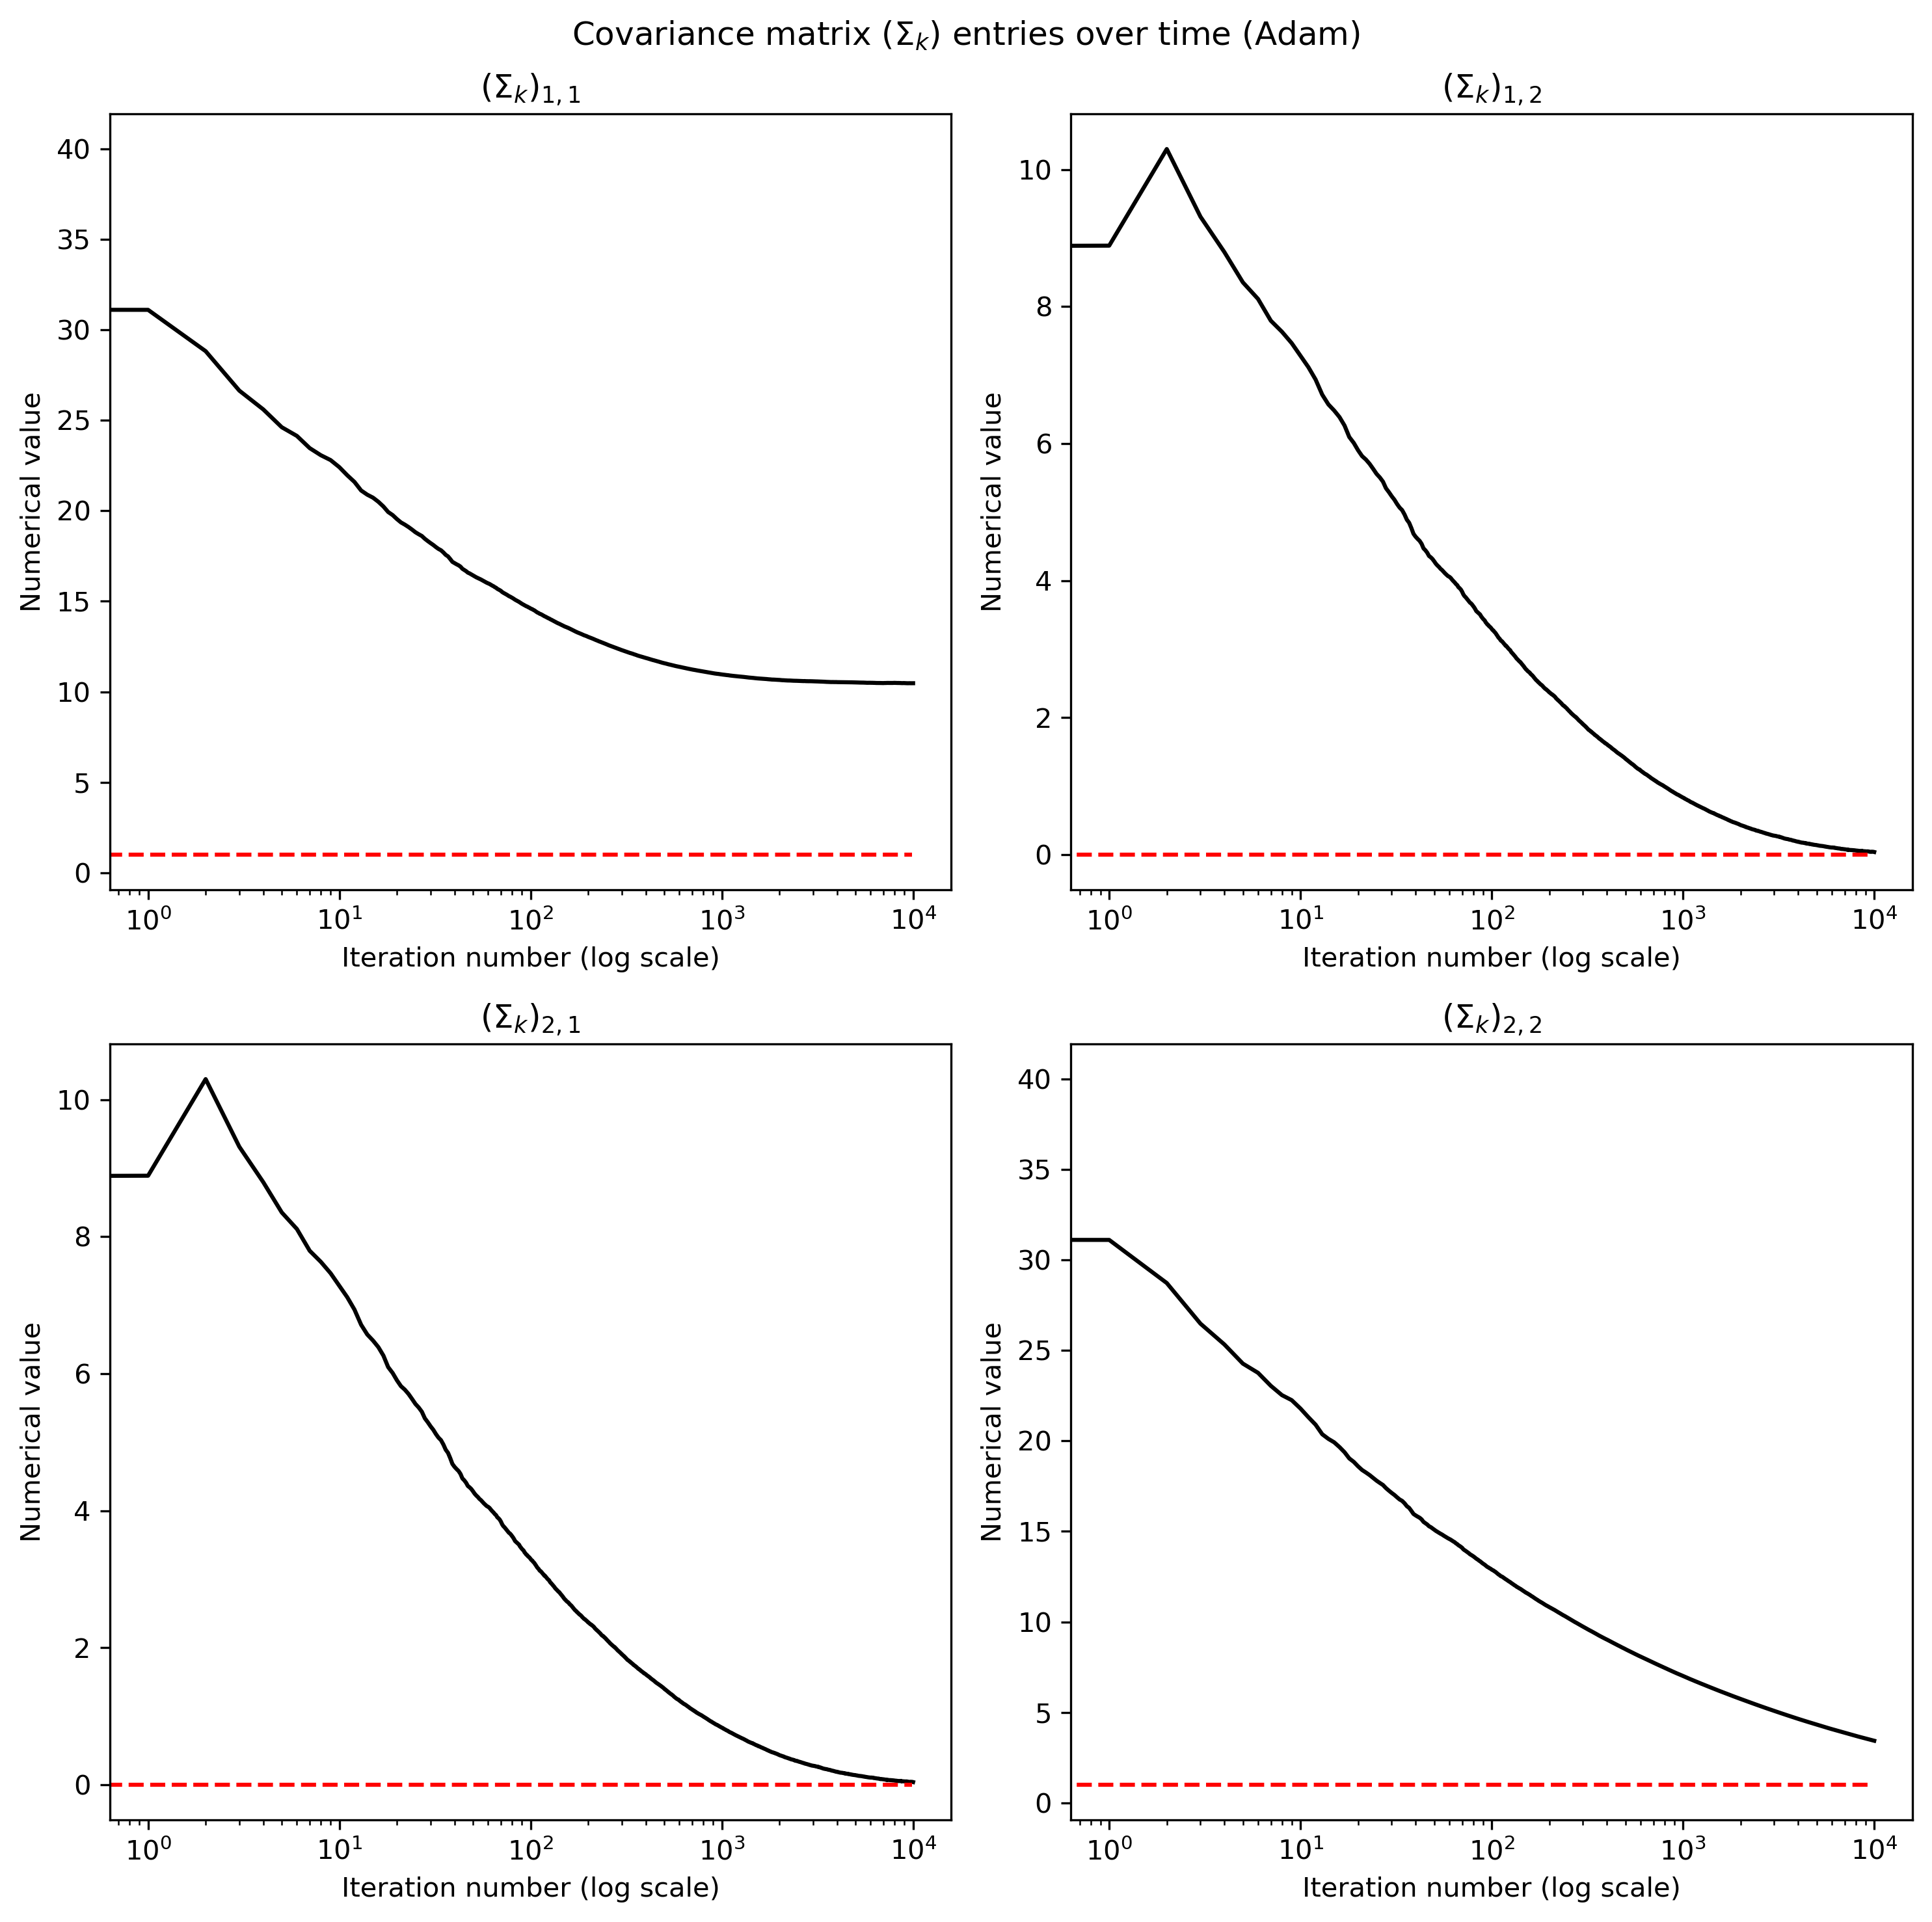

In [24]:
#sigma00 = [distributions[i].Sigma[0][0] for i in range(0, Niter)]
#sigma11 = [distributions[i].Sigma[1][1] for i in range(0, Niter)]
#sigma01 = [distributions[i].Sigma[0][1] for i in range(0, Niter)]
#sigma10 = [distributions[i].Sigma[1][0] for i in range(0, Niter)]
true = pi.avg_dist.Sigma
true00 = true[0][0]
true11 = true[1][1]
true01 = true[0][1]
true10 = true[1][0]
# make 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sigma00 = [d.Sigma[0][0] for d in distrs]
sigma10 = [d.Sigma[1][0] for d in distrs]
sigma01 = [d.Sigma[0][1] for d in distrs]
sigma11 = [d.Sigma[1][1] for d in distrs]
axs[0, 0].plot(sigma00, color="black")
axs[1, 0].plot(sigma10, color="black")
axs[0, 1].plot(sigma01, color="black")
axs[1, 1].plot(sigma11, color="black")

axs[0, 0].hlines(y=true00, color='r', linestyle='--', xmin=0, xmax=Niter-100)
axs[0, 0].set_title('$(\Sigma_k)_{1,1}$')
axs[0, 1].hlines(y=true01, color='r', linestyle='--', xmin=0, xmax=Niter-100)
axs[0, 1].set_title('$(\Sigma_k)_{1,2}$')
axs[1, 0].hlines(y=true10, color='r', linestyle='--', xmin=0, xmax=Niter-100)
axs[1, 0].set_title('$(\Sigma_k)_{2,1}$')
axs[1, 1].hlines(y=true11, color='r', linestyle='--', xmin=0, xmax=Niter-100)
axs[1, 1].set_title('$(\Sigma_k)_{2,2}$')
for ax in axs.flat:
    #ax.set(xlabel='iteration (log scale)', ylabel='sigma')
    # set x-axis to log scale
    ax.set_xscale('log')
    ax.set_xlabel("Iteration number (log scale)")
    ax.set_ylabel("Numerical value")
fig.suptitle('Covariance matrix $(\Sigma_k)$ entries over time (Adam)')
fig.tight_layout()
plt.show()
# plot entries of the covariance matrix

In [25]:
q_final = distrs[-1]

[[1.31973312e-35 2.81062394e-35 5.89317598e-35 ... 2.79434107e-35
  1.31192866e-35 6.06416580e-36]
 [1.34039085e-34 2.85510700e-34 5.98747019e-34 ... 2.88557616e-34
  1.35499488e-34 6.26430375e-35]
 [1.29803168e-33 2.76535271e-33 5.80023801e-33 ... 2.84115001e-33
  1.33436175e-33 6.16996990e-34]
 ...
 [2.72357229e-34 5.89743714e-34 1.25723880e-33 ... 2.88461282e-33
  1.37697521e-33 6.47134801e-34]
 [2.72149979e-35 5.89395784e-35 1.25671208e-34 ... 2.93065512e-34
  1.39919296e-34 6.57688964e-35]
 [2.59290258e-36 5.61641546e-36 1.19773929e-35 ... 2.83890196e-35
  1.35561885e-35 6.37316040e-36]]


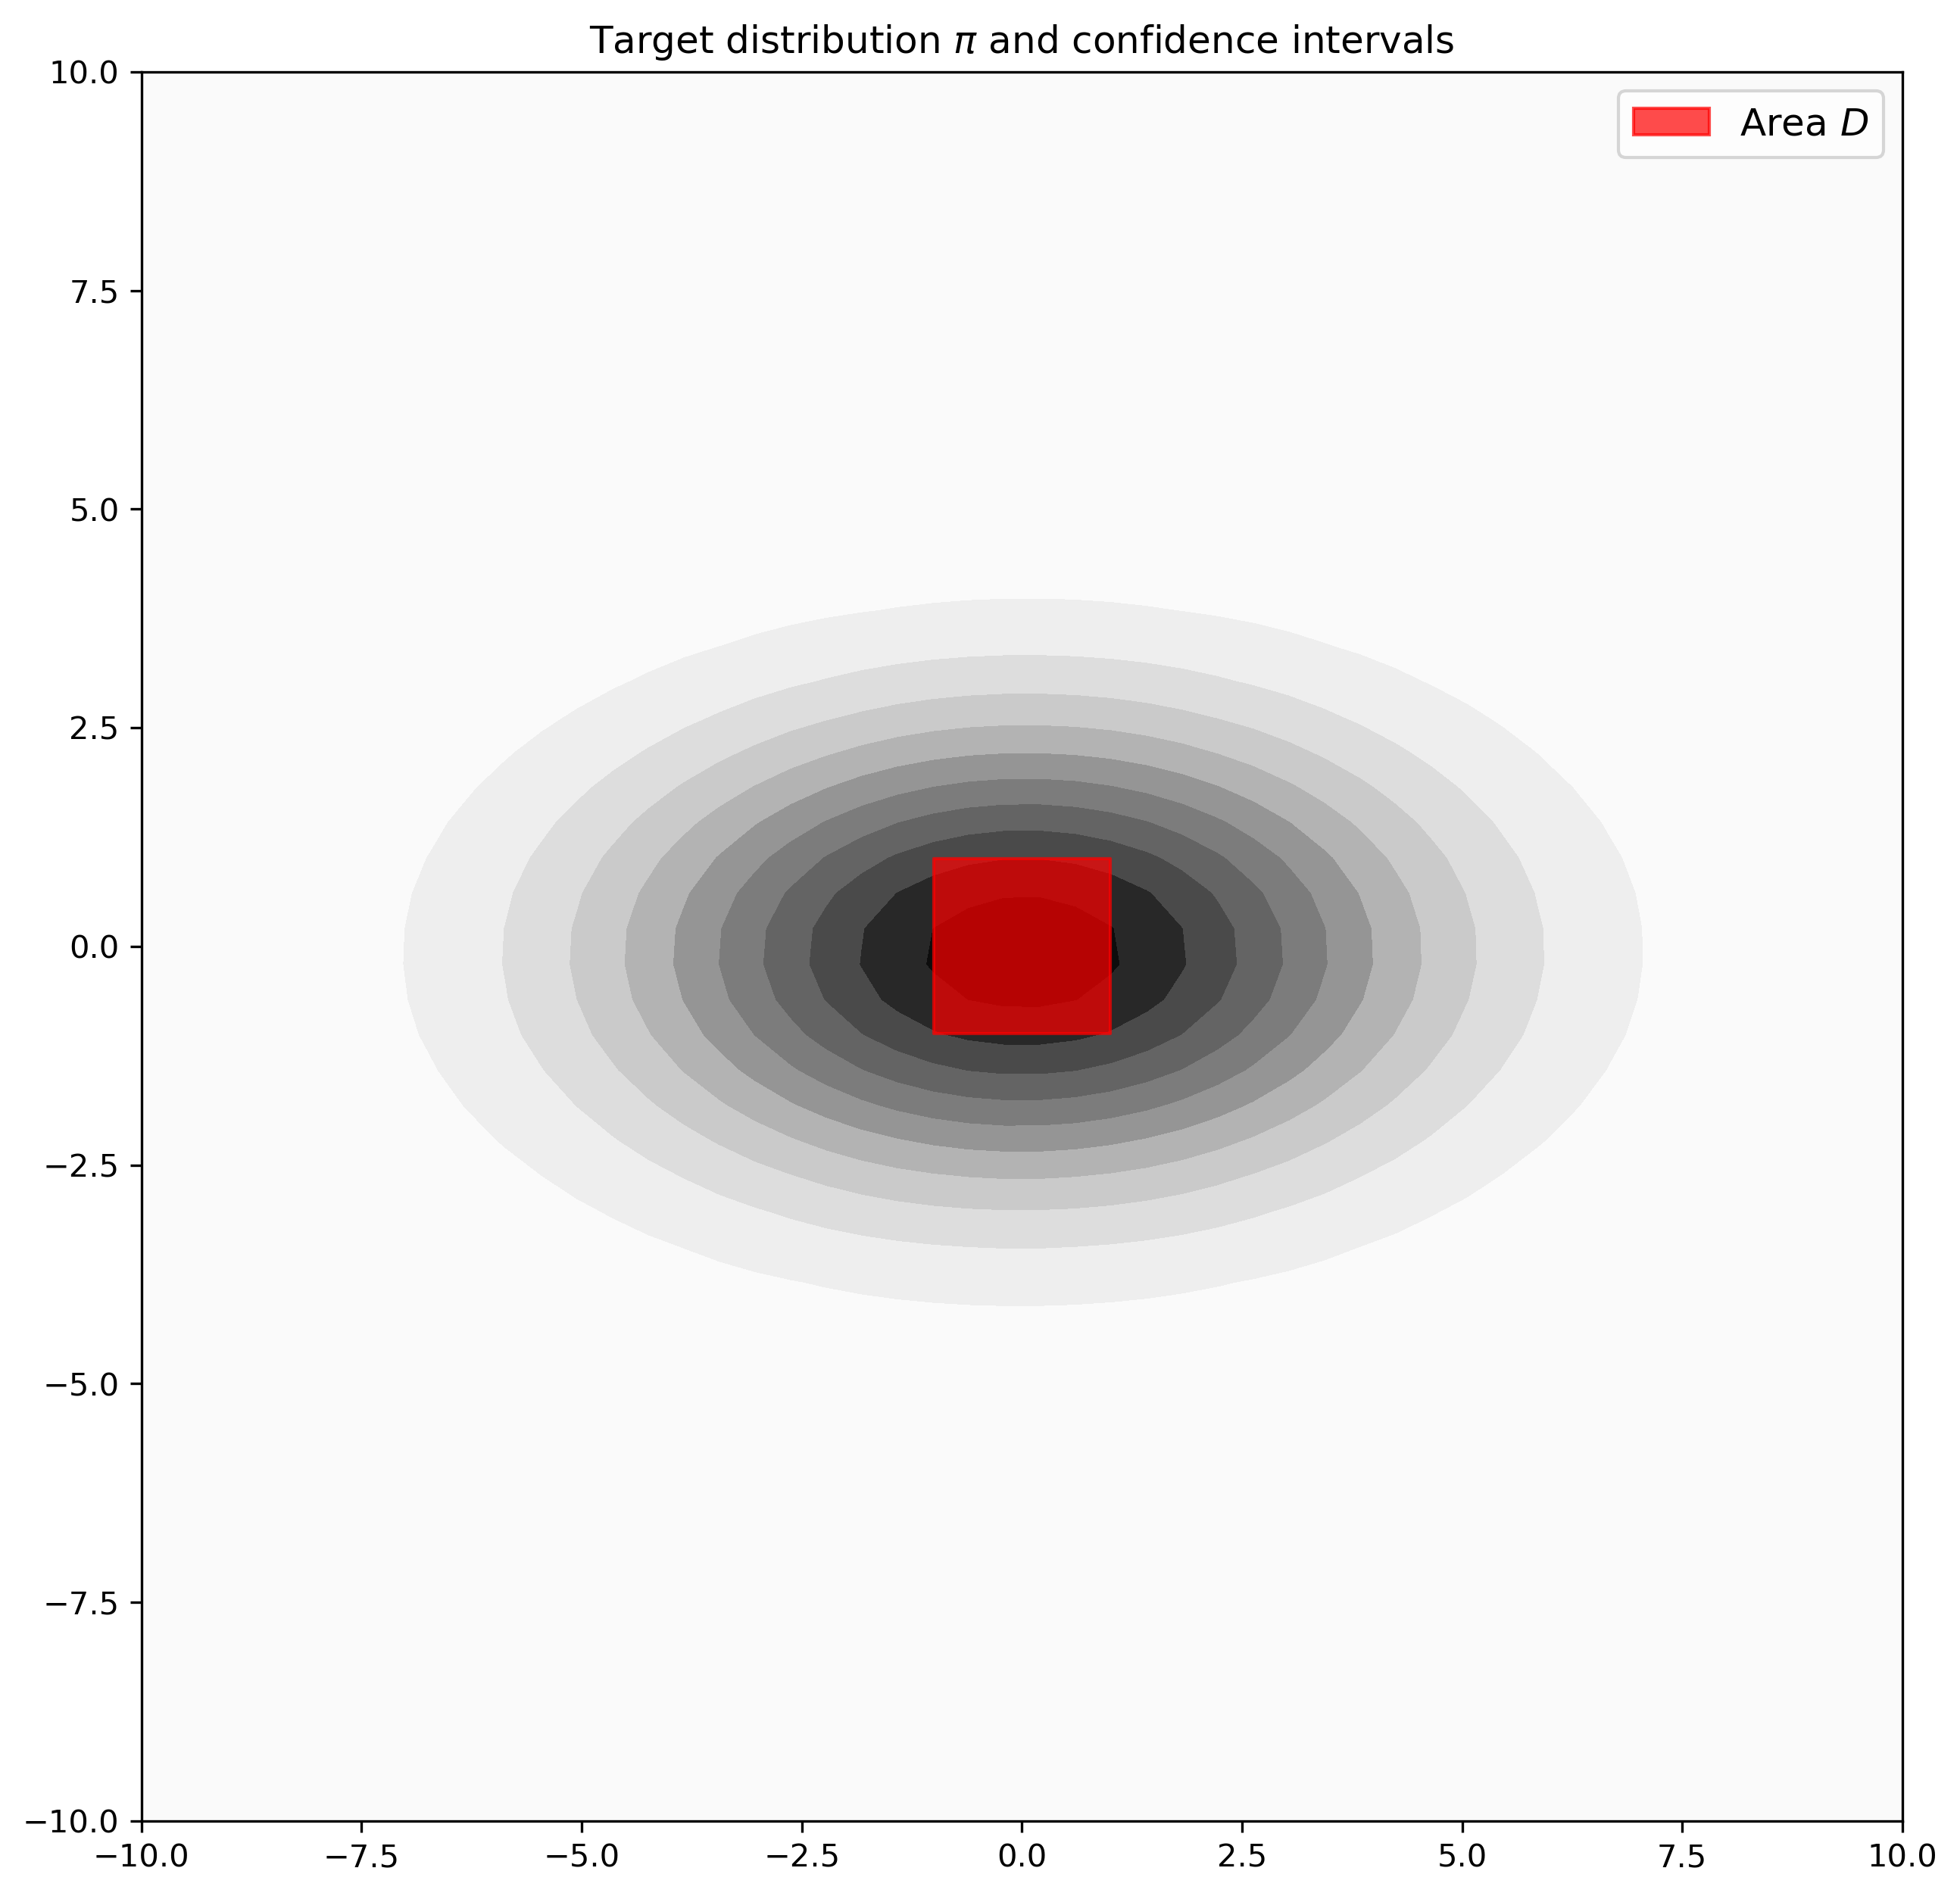

In [26]:
# make figure and ax
fig, ax = plt.subplots(1, 1, figsize=(10,10))
X, Y, Z_q = fill_z(q_final)
print(Z_q)
ax.contourf(X, Y, Z_q, levels=10, cmap="Greys", zorder=-10)
ax.fill_between([-1, 1], [-1, -1], [1, 1], color='red', zorder=5, alpha=0.7, label="Area $D$")
ax.legend(loc="upper right", fontsize=12)
ax.set_title("Target distribution $\pi$ and confidence intervals")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()


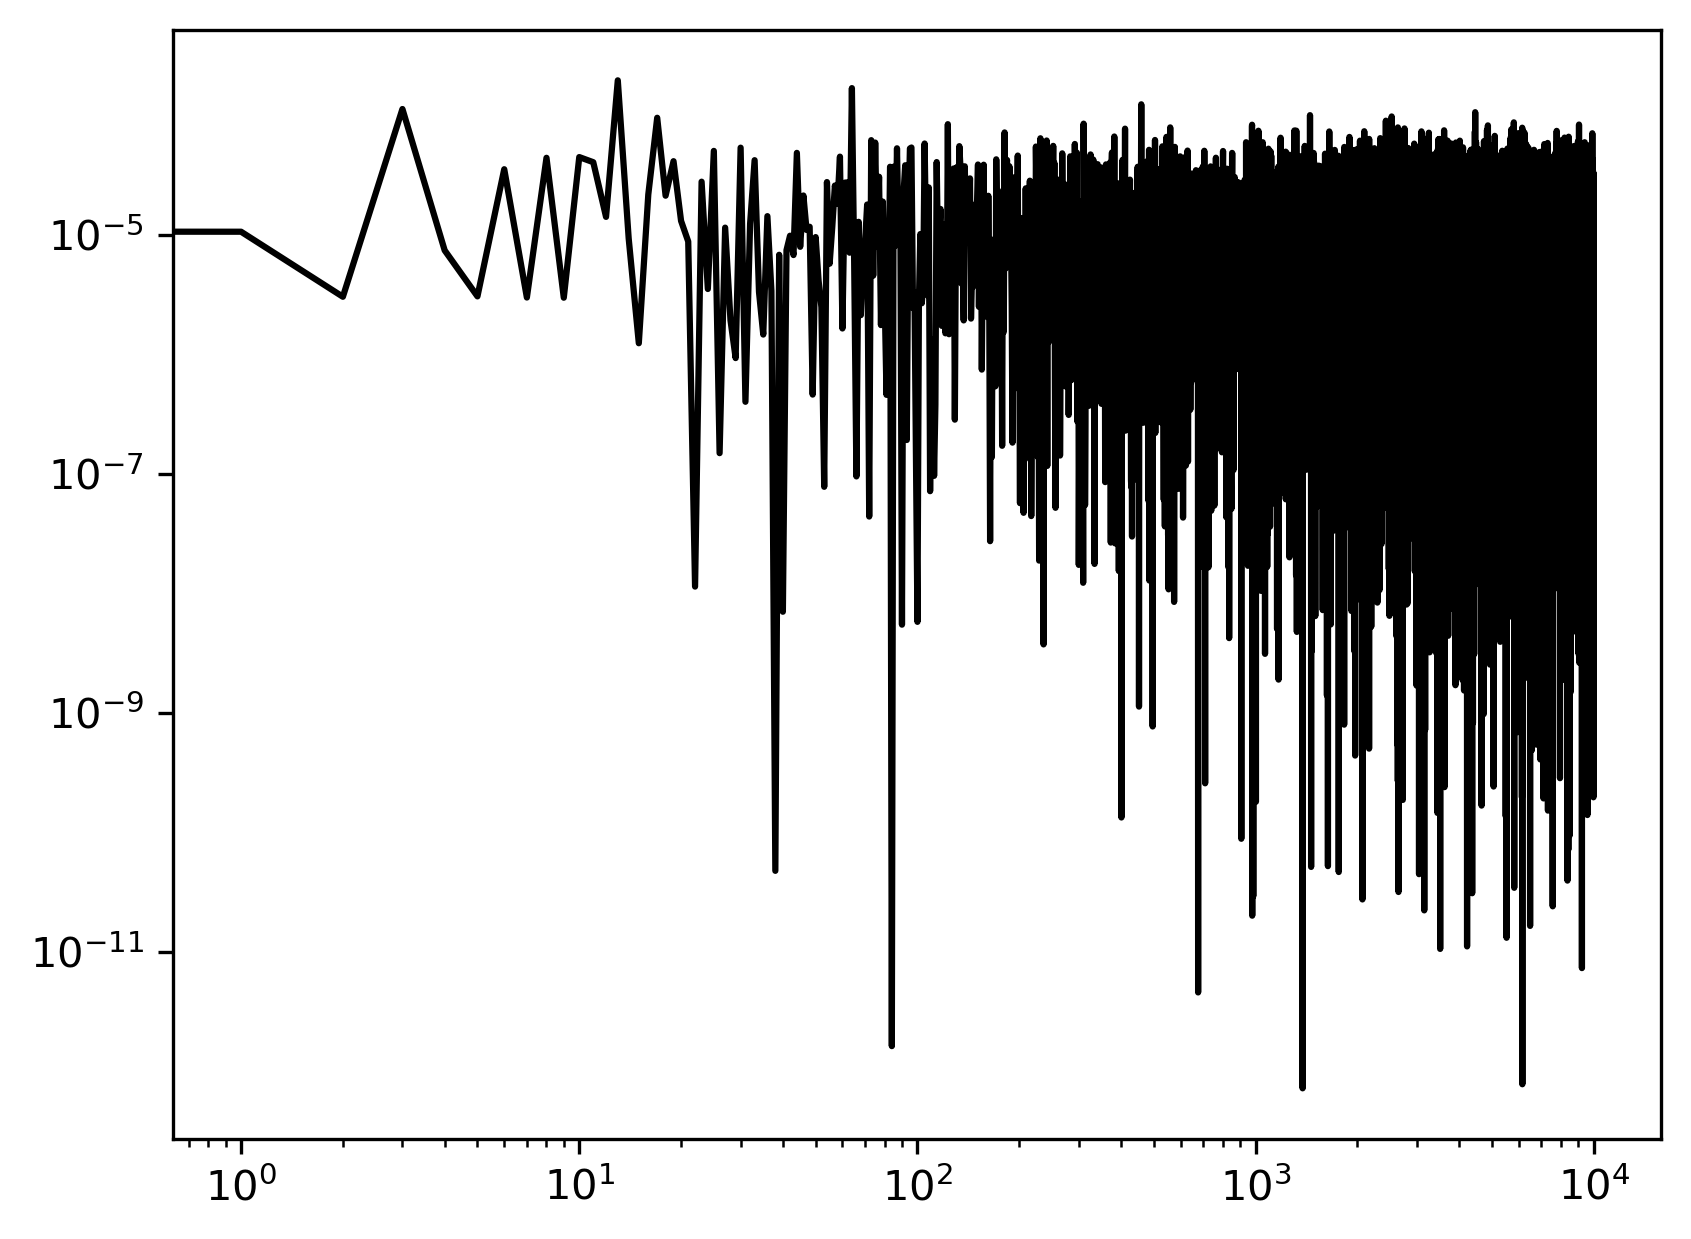

In [40]:
average_results = np.array(results_array_AdaGrad).mean(axis=0)
MSEs = (GT-average_results)**2

plt.plot(MSEs, color="black")
plt.xscale("log")
plt.yscale("log")